In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing

In [4]:
df.drop('customerID', axis='columns', inplace=True)
df.shape

(7043, 20)

In [5]:
df1 = df[df.TotalCharges != ' '].copy()
df1.shape

(7032, 20)

In [6]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

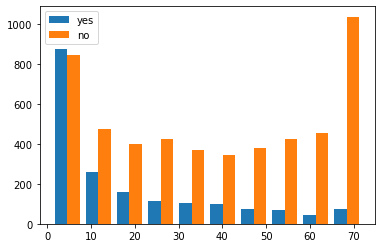

In [7]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],label=['yes','no'])
plt.legend()

In [8]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df1[column].unique()}')

In [9]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [10]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [11]:
yes_no_columns = []

for column in df1:
    if ((df1[column].unique().size == 2) and ('No' in list(df1[column])) and ('Yes' in list(df1[column]))):
        yes_no_columns.append(column)

In [12]:
yes_no_columns

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [13]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No': 0}, inplace=True)

In [14]:
df1['gender'].replace({'Female':1, 'Male': 0}, inplace=True)

In [15]:
for column in df1:
    print(f'{column}: {df1[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [16]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [18]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [19]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [20]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2512,1,0,1,0,0.309859,1,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
6071,0,0,1,1,1.000000,1,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
5007,0,0,0,0,0.338028,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2643,1,0,0,0,0.450704,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3737,1,0,0,0,0.056338,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


# Creating the ANN

In [21]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(5625, 26)

In [24]:
X_test.shape

(1407, 26)

In [25]:
import tensorflow as tf
import keras

In [28]:
# 3 layer model: input->hidden->output
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='relu'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train,epochs=500)

Epoch 1/500
176/176 [==============================] - 0s 2ms/step - loss: 0.8818 - accuracy: 0.6823
Epoch 2/500
176/176 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7538
Epoch 3/500
176/176 [==============================] - 1s 3ms/step - loss: 0.5296 - accuracy: 0.7627
Epoch 4/500
176/176 [==============================] - 1s 3ms/step - loss: 0.5326 - accuracy: 0.7739
Epoch 5/500
176/176 [==============================] - 1s 4ms/step - loss: 0.5200 - accuracy: 0.7764
Epoch 6/500
176/176 [==============================] - 1s 5ms/step - loss: 0.5109 - accuracy: 0.7737
Epoch 7/500
176/176 [==============================] - 1s 6ms/step - loss: 0.4958 - accuracy: 0.7799
Epoch 8/500
176/176 [==============================] - 1s 4ms/step - loss: 0.4974 - accuracy: 0.7860
Epoch 9/500
176/176 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 0.7927
Epoch 10/500
176/176 [==============================] - 1s 4ms/step - loss: 0.4890 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.4102 - accuracy: 0.8148
Epoch 161/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4154 - accuracy: 0.8149
Epoch 162/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4279 - accuracy: 0.8096
Epoch 163/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8112
Epoch 164/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4125 - accuracy: 0.8112
Epoch 165/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8151
Epoch 166/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8135
Epoch 167/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4105 - accuracy: 0.8137
Epoch 168/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4104 - accuracy: 0.8124
Epoch 169/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4103 - a

176/176 [==============================] - 1s 4ms/step - loss: 0.4569 - accuracy: 0.7972
Epoch 319/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.8059
Epoch 320/500
176/176 [==============================] - 0s 3ms/step - loss: 0.4217 - accuracy: 0.8089
Epoch 321/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4104 - accuracy: 0.8132
Epoch 322/500
176/176 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8135
Epoch 323/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4104 - accuracy: 0.8139
Epoch 324/500
176/176 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.8146
Epoch 325/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4084 - accuracy: 0.8135
Epoch 326/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.8114
Epoch 327/500
176/176 [==============================] - 1s 3ms/step - loss: 0.4059 - a

176/176 [==============================] - 1s 3ms/step - loss: 0.3962 - accuracy: 0.8203
Epoch 477/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8176
Epoch 478/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3979 - accuracy: 0.8178
Epoch 479/500
176/176 [==============================] - 1s 4ms/step - loss: 0.3967 - accuracy: 0.8164
Epoch 480/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3965 - accuracy: 0.8185
Epoch 481/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3965 - accuracy: 0.8183
Epoch 482/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3972 - accuracy: 0.8178
Epoch 483/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3958 - accuracy: 0.8180
Epoch 484/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3998 - accuracy: 0.8176
Epoch 485/500
176/176 [==============================] - 1s 3ms/step - loss: 0.3993 - a

In [32]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,),activation='relu'),
    keras.layers.Dense(13, input_shape=(26,),activation='relu'),
    keras.layers.Dense(6, input_shape=(26,),activation='sigmoid'),
    keras.layers.Dense(3, input_shape=(26,),activation='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train,epochs=25)

Epoch 1/25
176/176 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.6674
Epoch 2/25
176/176 [==============================] - 0s 3ms/step - loss: 0.5383 - accuracy: 0.7342
Epoch 3/25
176/176 [==============================] - 1s 4ms/step - loss: 0.4989 - accuracy: 0.7342
Epoch 4/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4800 - accuracy: 0.7461
Epoch 5/25
176/176 [==============================] - 1s 6ms/step - loss: 0.4675 - accuracy: 0.7899
Epoch 6/25
176/176 [==============================] - 1s 5ms/step - loss: 0.4584 - accuracy: 0.7996
Epoch 7/25
176/176 [==============================] - 1s 5ms/step - loss: 0.4523 - accuracy: 0.8009
Epoch 8/25
176/176 [==============================] - 2s 10ms/step - loss: 0.4459 - accuracy: 0.7988
Epoch 9/25
176/176 [==============================] - 1s 7ms/step - loss: 0.4401 - accuracy: 0.7996
Epoch 10/25
176/176 [==============================] - 1s 8ms/step - loss: 0.4365 - accuracy: 0.802

In [33]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 5ms/step - loss: 0.4431 - accuracy: 0.7783


[0.44314420223236084, 0.778251588344574]

In [34]:
yp = model.predict(X_test)
y_pred = []

for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

